In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import colors, cm, pyplot as plt
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

In [2]:
EXPERIMENT_BASE_DIR = '/data2/experiments'
EXPERIMENT_NAME = 'P3856'
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'

In [3]:
CONVERTED_DATABASE = '{}/{}/converted-databases/exp-{}-run-{}-converted.sqlite'.format(EXPERIMENT_BASE_DIR, EXPERIMENT_NAME, EXPERIMENT_NAME, RUN_NAME)

# frame types for PASEF mode
FRAME_TYPE_MS1 = 0
FRAME_TYPE_MS2 = 8

In [5]:
# determine these values by plotting the TIC - see the 'visualise the elution profile (TIC) of raw frames' notebook
rt_lower = 1600
rt_upper = 2300

In [6]:
db_conn = sqlite3.connect(CONVERTED_DATABASE)
ms1_df = pd.read_sql_query("select mz,intensity from frames where frame_type == {} and retention_time_secs >= {} and retention_time_secs <= {}".format(FRAME_TYPE_MS1, rt_lower, rt_upper), db_conn)
db_conn.close()

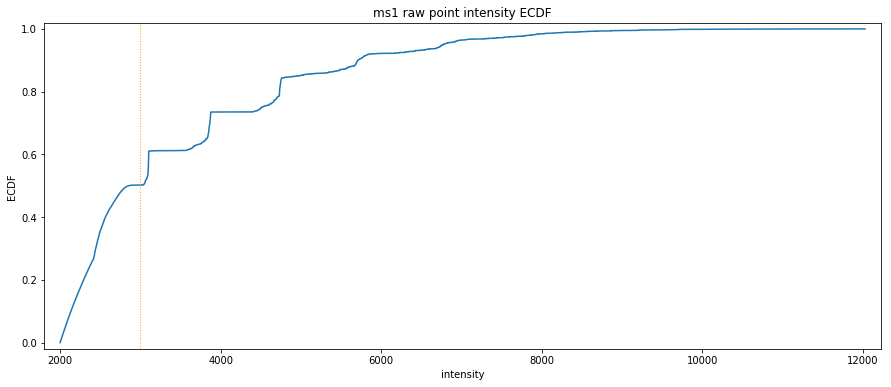

In [13]:
# determine the best clipping value using an ECDF

import statsmodels.api as sm
ecdf = sm.distributions.ECDF(ms1_df[ms1_df.intensity > 2000].intensity)

f, ax1 = plt.subplots()
plt.plot(ecdf.x, ecdf.y)
f.set_figheight(6)
f.set_figwidth(15)
plt.xlabel('intensity')
plt.ylabel('ECDF')
plt.axvline(x=3000, linestyle=':', linewidth=1, color='orange')
plt.margins(0.02)
plt.title("ms1 raw point intensity ECDF")
plt.show()

In [8]:
ecdf(3000)

0.5020708302634497

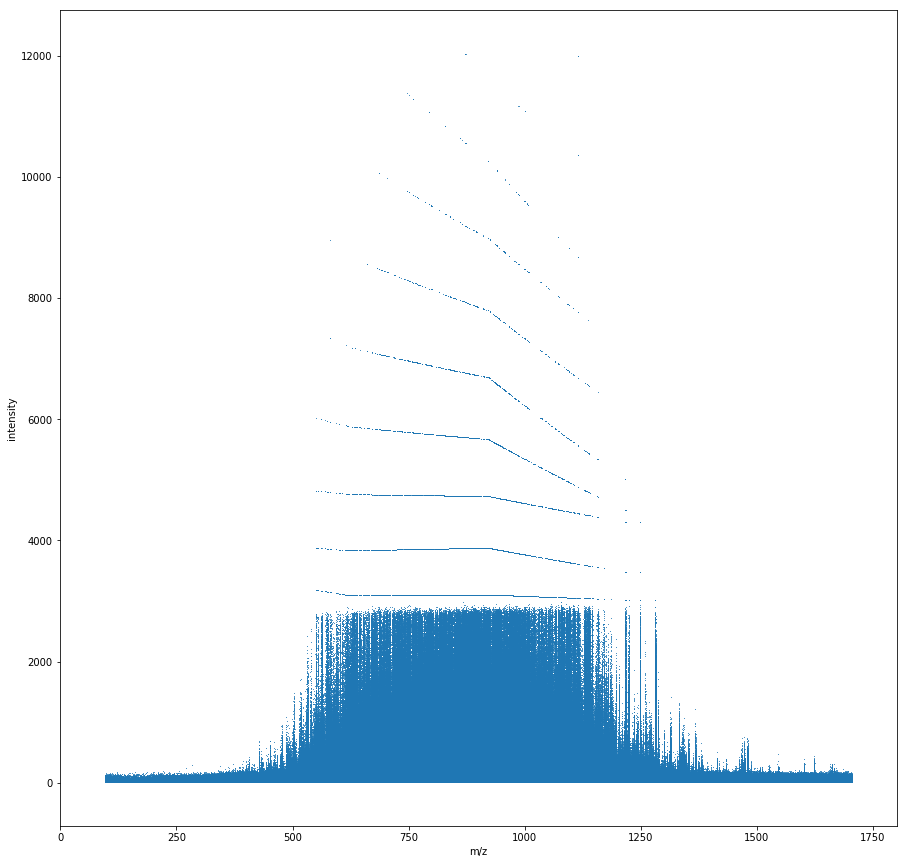

In [9]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

ax.scatter(ms1_df.mz, ms1_df.intensity, marker='o', lw=0, s=1, alpha=1.0)

plt.xlabel('m/z')
plt.ylabel('intensity')
# plt.ylim((0,910))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()

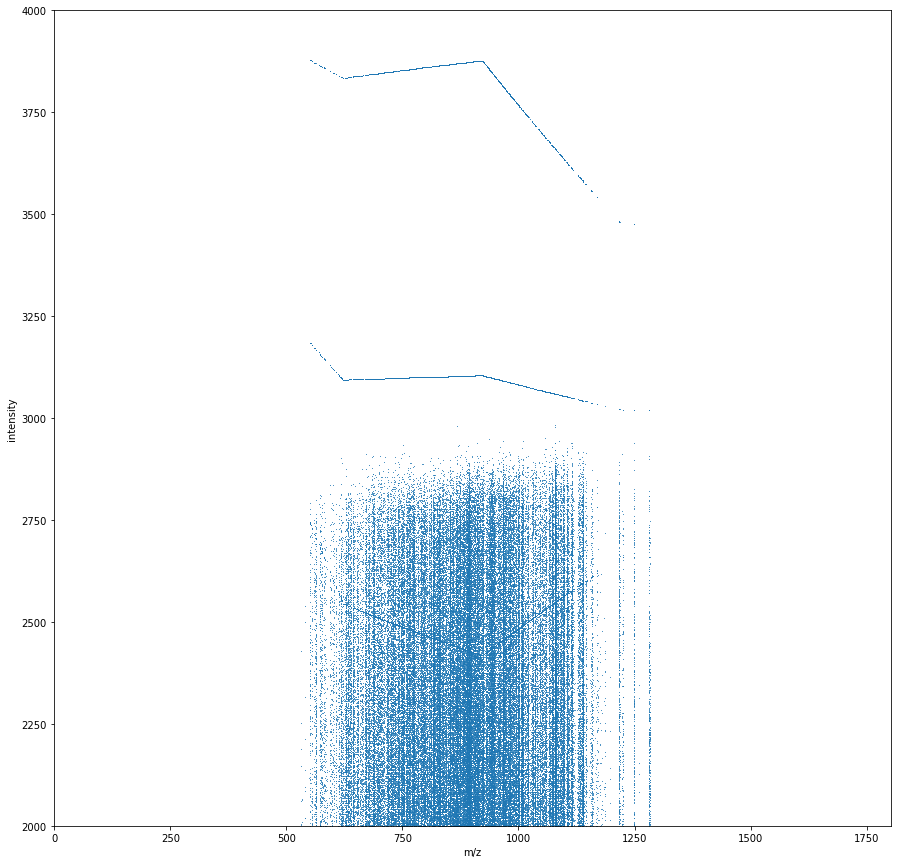

In [10]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

ax.scatter(ms1_df.mz, ms1_df.intensity, marker='o', lw=0, s=1, alpha=1.0)

plt.xlabel('m/z')
plt.ylabel('intensity')
plt.ylim((2000,4000))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()